In [1]:
# ============================
# Import Libraries
# ============================
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Smarth
[nltk_data]     Kaushal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Class distribution:
label
0    0.865937
1    0.134063
Name: proportion, dtype: float64


C:\Users\Smarth Kaushal\AppData\Local\Temp\ipykernel_23892\2812253405.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=data, palette = ['#00D4AA', '#FF6B8B'], saturation=0.9, edgecolor='black', linewidth=1.2)


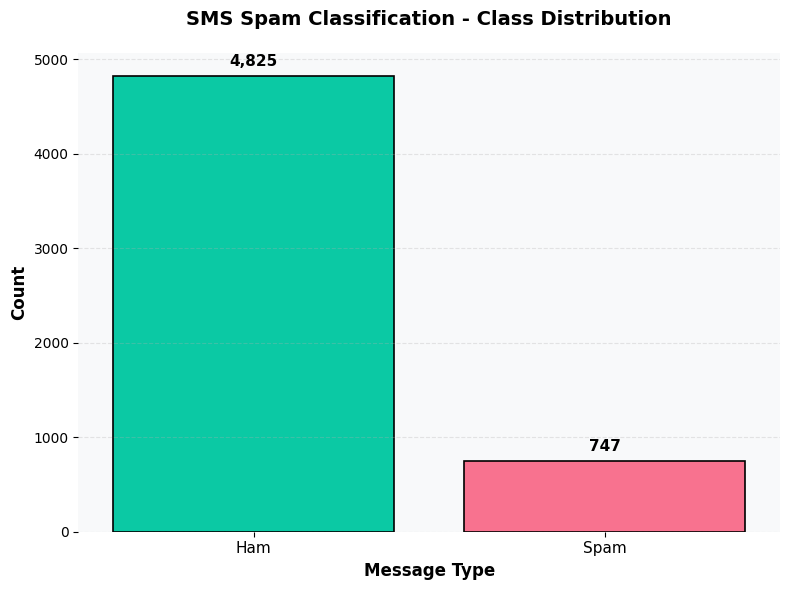

In [2]:
# ================================================================
# PART A — Data Preprocessing & Exploration
# ================================================================

# 1️⃣ Load Dataset
data = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
data.columns = ['label', 'text']

# 2️⃣ Convert labels: spam → 1, ham → 0
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# 3️⃣ Text Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    words = [w for w in text.split() if w not in stop_words]  # remove stopwords
    return " ".join(words)

data['clean_text'] = data['text'].apply(preprocess_text)

# 4️⃣ TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['clean_text'])
y = data['label']

# 5️⃣ Train-test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6️⃣ Show class distribution
print("Class distribution:")
print(data['label'].value_counts(normalize=True))

# Plot the distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=data, palette = ['#00D4AA', '#FF6B8B'], saturation=0.9, edgecolor='black', linewidth=1.2)

# Customize the plot
plt.title('SMS Spam Classification - Class Distribution', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Message Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'], fontsize=11)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=11, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

# Customize grid and background
plt.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_facecolor('#F8F9FA')
plt.gcf().patch.set_facecolor('white')

# Remove spines for cleaner look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()



PART B — Decision Stump
Train Accuracy: 0.884
Test Accuracy: 0.892


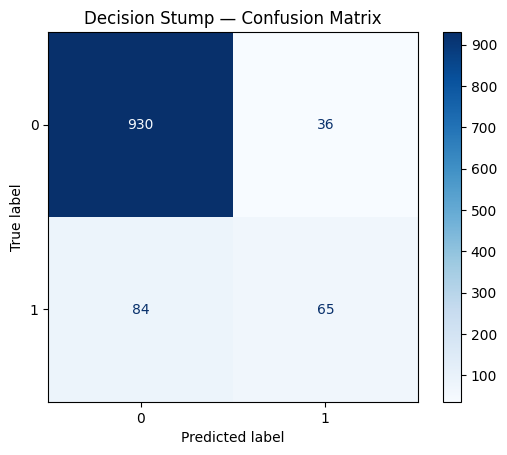


Comment: A single-level decision tree (stump) is too simple to capture complex text patterns.
It only splits based on one feature (word), missing multi-word relationships or nuanced context.


In [3]:
# ================================================================
# PART B — Weak Learner Baseline (Decision Stump)
# ================================================================
print("\n============================")
print("PART B — Decision Stump")
print("============================")

stump = DecisionTreeClassifier(max_depth=1, random_state=42)
stump.fit(X_train, y_train)

y_pred_train = stump.predict(X_train)
y_pred_test = stump.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Decision Stump — Confusion Matrix")
plt.show()

print("\nComment: A single-level decision tree (stump) is too simple to capture complex text patterns.\n"
      "It only splits based on one feature (word), missing multi-word relationships or nuanced context.")



PART C — Manual AdaBoost (T = 15)

Iteration 1
Misclassified samples: [ 14  42  49  50  59  62  86  93  96 100]...
Weighted Error: 0.1162
Alpha: 1.0144

Iteration 2
Misclassified samples: [ 9 15 22 31 39 49 59 66 76 88]...
Weighted Error: 0.1526
Alpha: 0.8572

Iteration 3
Misclassified samples: [ 9 15 31 39 49 50 59 66 76 86]...
Weighted Error: 0.2696
Alpha: 0.4983

Iteration 4
Misclassified samples: [ 9 15 31 39 49 50 59 62 66 76]...
Weighted Error: 0.3432
Alpha: 0.3246

Iteration 5
Misclassified samples: [15 31 39 49 50 59 66 76 86 88]...
Weighted Error: 0.3933
Alpha: 0.2167

Iteration 6
Misclassified samples: [ 9 15 22 31 39 50 59 62 66 76]...
Weighted Error: 0.4337
Alpha: 0.1335

Iteration 7
Misclassified samples: [ 0  1  2  3  4  5  6  7  8 10]...
Weighted Error: 0.4698
Alpha: 0.0605

Iteration 8
Misclassified samples: [ 9 15 22 31 39 49 50 59 62 66]...
Weighted Error: 0.4564
Alpha: 0.0874

Iteration 9
Misclassified samples: [ 0  1  2  3  4  5  6  7  8 10]...
Weighted Error: 0.46

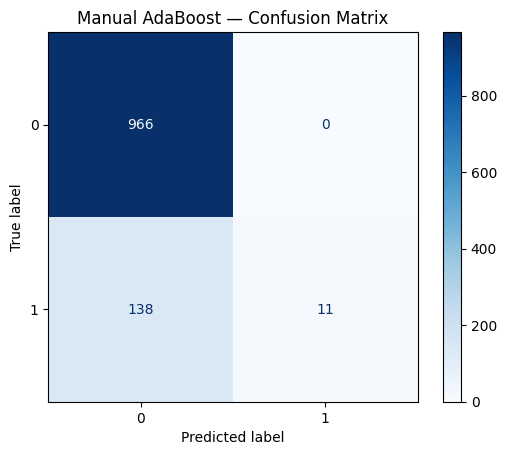

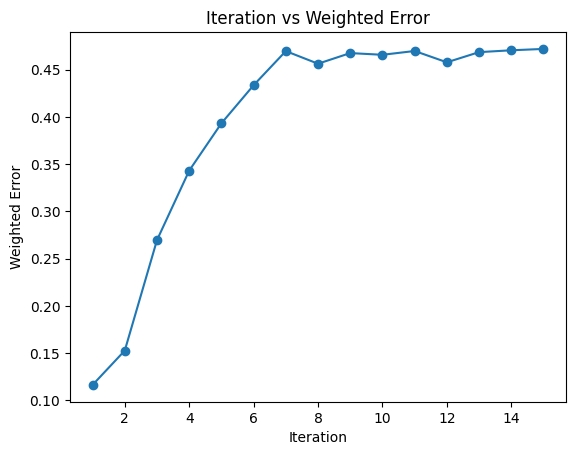

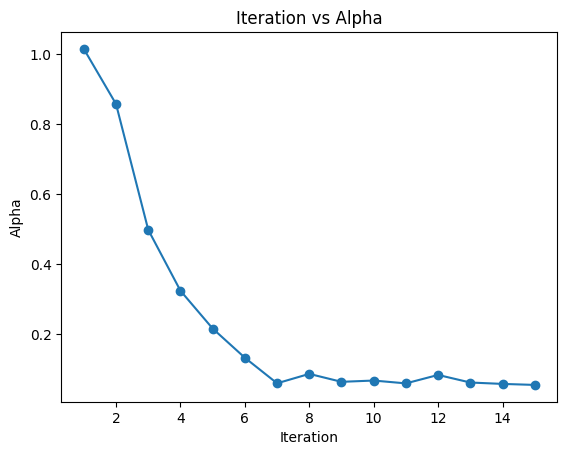


Interpretation: Initially, all samples have equal weight. Misclassified samples receive higher weights in later iterations, forcing new stumps to focus on harder examples.


In [4]:
# ================================================================
# PART C — Manual AdaBoost (T = 15 rounds)
# ================================================================
print("\n============================")
print("PART C — Manual AdaBoost (T = 15)")
print("============================")

T = 15
n = X_train.shape[0]
weights = np.ones(n) / n
alphas = []
weighted_errors = []
models = []

for t in range(1, T + 1):
    # Train weak learner
    stump_t = DecisionTreeClassifier(max_depth=1, random_state=42)
    stump_t.fit(X_train, y_train, sample_weight=weights)
    y_pred = stump_t.predict(X_train)

    # Compute weighted error
    incorrect = (y_pred != y_train)
    error = np.dot(weights, incorrect) / np.sum(weights)

    # Compute alpha
    alpha = 0.5 * np.log((1 - error) / (error + 1e-10))
    
    # Update weights
    weights *= np.exp(-alpha * y_train * (2 * y_pred - 1))
    weights /= np.sum(weights)

    alphas.append(alpha)
    weighted_errors.append(error)
    models.append(stump_t)

    # Print progress
    mis_idx = np.where(incorrect)[0]
    print(f"\nIteration {t}")
    print(f"Misclassified samples: {mis_idx[:10]}{'...' if len(mis_idx)>10 else ''}")
    print(f"Weighted Error: {error:.4f}")
    print(f"Alpha: {alpha:.4f}")

# Prediction function
def adaboost_predict(X, models, alphas):
    pred = np.zeros(X.shape[0])
    for model, alpha in zip(models, alphas):
        pred += alpha * (2 * model.predict(X) - 1)
    return (pred > 0).astype(int)

# Final predictions
y_train_pred = adaboost_predict(X_train, models, alphas)
y_test_pred = adaboost_predict(X_test, models, alphas)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\nFinal Train Accuracy: {train_acc:.3f}")
print(f"Final Test Accuracy: {test_acc:.3f}")

cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Manual AdaBoost — Confusion Matrix")
plt.show()

# Plots
plt.figure()
plt.plot(range(1, T+1), weighted_errors, marker='o')
plt.title("Iteration vs Weighted Error")
plt.xlabel("Iteration")
plt.ylabel("Weighted Error")
plt.show()

plt.figure()
plt.plot(range(1, T+1), alphas, marker='o')
plt.title("Iteration vs Alpha")
plt.xlabel("Iteration")
plt.ylabel("Alpha")
plt.show()

print("\nInterpretation: Initially, all samples have equal weight. "
      "Misclassified samples receive higher weights in later iterations, "
      "forcing new stumps to focus on harder examples.")



PART D — Sklearn AdaBoost
Train Accuracy: 0.917
Test Accuracy: 0.925


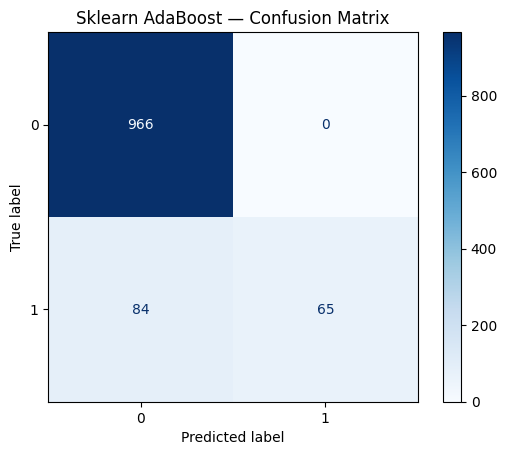


Comparison:
Sklearn AdaBoost (with 100 estimators) achieves better performance than manual AdaBoost (15 iterations) since it combines more learners and tunes learning rate efficiently.


In [5]:
# ================================================================
# PART D — Sklearn AdaBoost
# ================================================================
print("\n============================")
print("PART D — Sklearn AdaBoost")
print("============================")

sk_adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.6,
    random_state=42
)
sk_adaboost.fit(X_train, y_train)

y_train_pred = sk_adaboost.predict(X_train)
y_test_pred = sk_adaboost.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Sklearn AdaBoost — Confusion Matrix")
plt.show()

print("\nComparison:")
print("Sklearn AdaBoost (with 100 estimators) achieves better performance "
      "than manual AdaBoost (15 iterations) since it combines more learners "
      "and tunes learning rate efficiently.")
